<h1 style="text-align: center;">Working with DataFrame. Data processing. Clustering tasks</h1>

###### -- Download the Dataset_all.xlsx file to DataFrame.

In [1]:
# importing libraries to work with dataframe (pandas) and numerical operations (numpy)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading an Excel file and setting the parameter "header" to 1 for Data Frame to use the first row as the column names
df = pd.read_excel('Dataset_all.xlsx', header=1)
df.set_index('№иб', inplace=True)
df

,Діагноз,пол,возраст,одышка,одышка при физнагрузке,невозможность вдохнуть полной грудью,скованность в гр клетке,нехватка воздуха,нарушение ночного сна,удушье,...,отклонение ЭОС,нарушение АВ-проводимости,реполяриз изменения,правые камеры,ритм,нарушение внутрижелуд пров,блокада пучка Гиса,ГМЛЖ,рестриктивный тип,обструктивный тип
№иб,,,,,,,,,,,,,,,,,,,,,
1440,ХОЗЛ,0,79,1,1,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,3
1484,ХОЗЛ,0,76,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,2,3,3
1497,ХОЗЛ,1,72,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1530,ХОЗЛ,1,54,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,3,2
1583,ХОЗЛ,0,81,0,1,1,1,0,0,0,...,0,1,0,0,1,1,0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,Пневмонія,1,84,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,2,1,1
5033,Пневмонія,0,67,0,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,3,3
5079,Пневмонія,1,26,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1


###### -- Use custom method for filling gaps

In [2]:
# custom method for fuzzy spatial extrapolation
import numpy as np

def fuzzy_spatial_extrapolation(df, target_column_name):
    # searching for indices with missing values and without missing values
    missing_indices = df[df[target_column_name].isnull()].index
    non_missing_indices = df.dropna(subset=[target_column_name]).index
    # stating which column is without missing values
    columns_non_missing = df.columns.difference([target_column_name])
    # calculating number of columns for normalization
    num_columns = len(columns_non_missing)
    for target_index in missing_indices:
        # data to calculate the distance
        data_for_distance = df.loc[non_missing_indices, columns_non_missing]
        # calculating the abs of differences between between the patient with a gap and other patients
        absolute_diff = data_for_distance.sub(
            df.loc[target_index, columns_non_missing], axis=1
        ).abs()
        # the sum of absolute differences normalized by the columns num
        similarities = absolute_diff.sum(axis=1) / num_columns
        # inverse similarities
        inverse_similarities = np.reciprocal(similarities + 1e-10)  # Avoid division by zero
        # normalizing inverse similarities to vary between 0 and 1
        normalized_similarities = inverse_similarities / np.sum(inverse_similarities)
        # membership degree as normalized inverse similarities
        membership_degree = normalized_similarities
        # calculating the missing value using a weighted average
        new_value = np.sum(df.loc[non_missing_indices, target_column_name] * membership_degree)
        # filling the gap
        df.at[target_index, target_column_name] = new_value

    return df

# excluding the column with diagnosis
df_filled = df.iloc[:, 1:]

# dropping columns with more than 20% gaps
columns_to_drop = df_filled.columns[df_filled.isnull().mean() > 0.2]
df_filled = df_filled.drop(columns=columns_to_drop)

# determining columns with gaps in the remaining DataFrame
columns_with_nan = df_filled.columns[df_filled.isnull().any()]

# filling in the columns with a custom method of fuzzy spatial extrapolation
for column in columns_with_nan:
    fuzzy_spatial_extrapolation(df_filled, column)

# inserting back the column with diagnoses
df_filled.insert(0, 'Діагноз', df['Діагноз'])
df_filled


,Діагноз,пол,возраст,одышка,одышка при физнагрузке,невозможность вдохнуть полной грудью,скованность в гр клетке,нехватка воздуха,нарушение ночного сна,удушье,...,отклонение ЭОС,нарушение АВ-проводимости,реполяриз изменения,правые камеры,ритм,нарушение внутрижелуд пров,блокада пучка Гиса,ГМЛЖ,рестриктивный тип,обструктивный тип
№иб,,,,,,,,,,,,,,,,,,,,,
1440,ХОЗЛ,0,79,1,1,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,3
1484,ХОЗЛ,0,76,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,2,3,3
1497,ХОЗЛ,1,72,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1530,ХОЗЛ,1,54,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,3,2
1583,ХОЗЛ,0,81,0,1,1,1,0,0,0,...,0,1,0,0,1,1,0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,Пневмонія,1,84,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,2,1,1
5033,Пневмонія,0,67,0,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,3,3
5079,Пневмонія,1,26,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1


###### -- Visualize dataframe using PCA and TSNE method. Use method for normalizing or standardizing features.

In [3]:
# let's assign numbers 1-3 to the corresponding diagnoses
encoding = {"ХОЗЛ": 0, "БА": 1, "Пневмонія": 2}
df_filled['Діагноз'] = df_filled['Діагноз'].replace(encoding)
df_filled

,Діагноз,пол,возраст,одышка,одышка при физнагрузке,невозможность вдохнуть полной грудью,скованность в гр клетке,нехватка воздуха,нарушение ночного сна,удушье,...,отклонение ЭОС,нарушение АВ-проводимости,реполяриз изменения,правые камеры,ритм,нарушение внутрижелуд пров,блокада пучка Гиса,ГМЛЖ,рестриктивный тип,обструктивный тип
№иб,,,,,,,,,,,,,,,,,,,,,
1440,0,0,79,1,1,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,3
1484,0,0,76,1,1,0,0,0,0,0,...,0,0,1,0,1,0,0,2,3,3
1497,0,1,72,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
1530,0,1,54,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,3,2
1583,0,0,81,0,1,1,1,0,0,0,...,0,1,0,0,1,1,0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868,2,1,84,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,2,1,1
5033,2,0,67,0,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,3,3
5079,2,1,26,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1


In [4]:
from sklearn.preprocessing import MinMaxScaler

# preparing table for normalization - removing column 'Diagnosis with categorical data'
normalized_df = df_filled.drop('Діагноз', axis=1).copy()
df_diagnosis = df_filled.reset_index().drop('№иб', axis=1).copy()

# normalizing data
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(normalized_df), columns=normalized_df.columns)
normalized_df

,пол,возраст,одышка,одышка при физнагрузке,невозможность вдохнуть полной грудью,скованность в гр клетке,нехватка воздуха,нарушение ночного сна,удушье,заложенность носа,...,отклонение ЭОС,нарушение АВ-проводимости,реполяриз изменения,правые камеры,ритм,нарушение внутрижелуд пров,блокада пучка Гиса,ГМЛЖ,рестриктивный тип,обструктивный тип
0,0.0,0.859155,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,1.0,0.0,0.000000,1.000000
1,0.0,0.816901,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.5,0.0,0.0,1.0,1.000000,1.000000
2,1.0,0.760563,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.333333,0.333333
3,1.0,0.507042,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.666667
4,0.0,0.887324,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.5,1.0,0.0,0.5,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1.0,0.929577,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.5,0.0,1.0,1.0,0.333333,0.333333
128,0.0,0.690141,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,1.000000,1.000000
129,1.0,0.112676,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.333333,0.333333
130,0.0,0.901408,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.333333


In [5]:
# fitting principal components analysis method to preprocessed DataFrame
from sklearn.decomposition import PCA

# initializing pca with 3 components
pca = PCA(n_components=3)

# fitting pca to the preprocessed data
principal_comp = pca.fit_transform(normalized_df)
principal_comp

array([[ 1.27115626e+00, -1.05052553e+00, -1.06664199e+00],
       [ 1.39444572e-01, -1.07023148e-01, -8.26651881e-01],
       [ 3.56068977e-01,  2.38387670e-01,  1.66422583e+00],
       [ 1.89251699e+00, -3.92179568e-01,  1.51675686e+00],
       [ 1.71766527e+00, -5.24206810e-02, -6.10014796e-02],
       [ 1.20358609e+00,  8.09666257e-02,  1.74608557e+00],
       [ 1.00403046e+00,  4.91541328e-01,  1.51359100e+00],
       [ 9.02427571e-01, -2.68199483e-01,  1.77110428e+00],
       [ 1.20267485e+00,  3.85095506e-01,  1.33356908e+00],
       [ 1.17291026e+00,  1.07025030e-01, -1.06592209e+00],
       [ 7.21780685e-01, -1.01865743e+00, -1.05350702e+00],
       [ 1.16114578e+00, -1.27661655e+00,  2.76703715e-01],
       [ 1.09672668e+00,  7.84950369e-02,  1.28166944e+00],
       [-5.32538542e-03, -7.46578460e-01, -3.39204579e-01],
       [ 8.21738250e-01,  5.73337759e-01,  6.38596879e-01],
       [ 3.93794853e-01, -1.17184410e+00, -6.13784299e-01],
       [ 6.36916977e-01, -8.21856112e-01

In [6]:
# creating new DataFrame that contains 2 principal components and a column with diagnosis
pca_df = pd.DataFrame(data=principal_comp[:, :2], 
                      columns=['Principal component 1',
                               'Principal component 2'])
pca_df['Діагноз'] = df_diagnosis['Діагноз']
pca_df

,Principal component 1,Principal component 2,Діагноз
0,1.271156,-1.050526,0
1,0.139445,-0.107023,0
2,0.356069,0.238388,0
3,1.892517,-0.392180,0
4,1.717665,-0.052421,0
...,...,...,...
127,-1.104499,-0.791097,2
128,-0.660198,-0.552632,2
129,-1.214481,0.045165,2
130,-0.897886,-0.399060,2


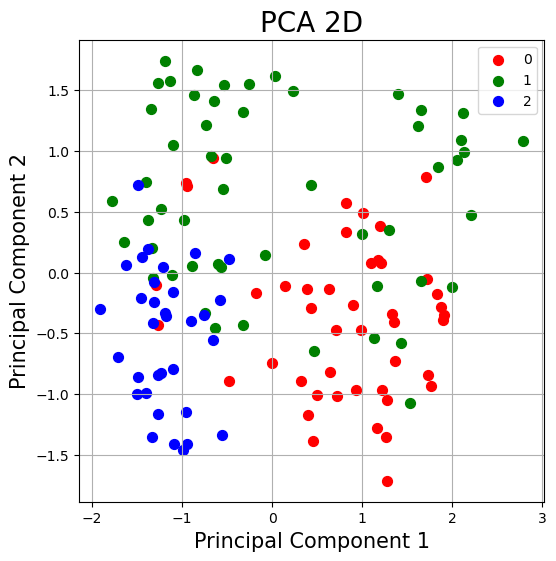

In [7]:
# visualizing the result
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA 2D', fontsize = 20)
diagnoses = [0, 1, 2]
colors = ['r', 'g', 'b']
for diagnosis, color in zip(diagnoses,colors):
    indicesToKeep = pca_df['Діагноз'] == diagnosis
    ax.scatter(pca_df.loc[indicesToKeep, 'Principal component 1']
               , pca_df.loc[indicesToKeep, 'Principal component 2']
               , c = color
               , s = 50)
ax.legend(diagnoses)
ax.grid()

In [8]:
# creating new DataFrame that contains 3 principal components and a column with diagnosis
pca_df_3d = pd.DataFrame(data=principal_comp, 
                         columns=['PC1', 
                                  'PC2', 
                                  'PC3'])
pca_df_3d['Діагноз'] = df_diagnosis['Діагноз']
pca_df_3d

,PC1,PC2,PC3,Діагноз
0,1.271156,-1.050526,-1.066642,0
1,0.139445,-0.107023,-0.826652,0
2,0.356069,0.238388,1.664226,0
3,1.892517,-0.392180,1.516757,0
4,1.717665,-0.052421,-0.061001,0
...,...,...,...,...
127,-1.104499,-0.791097,0.774176,2
128,-0.660198,-0.552632,0.096644,2
129,-1.214481,0.045165,0.203406,2
130,-0.897886,-0.399060,0.435677,2


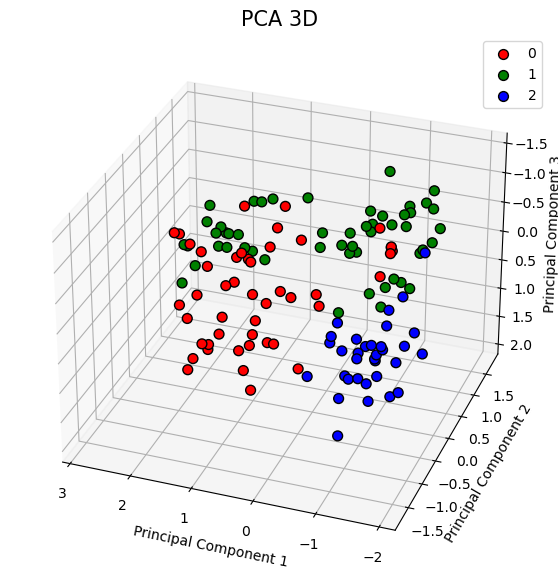

In [9]:
# visualizing the result
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_zlabel('Principal Component 3', fontsize = 10)
ax.set_title('PCA 3D', fontsize = 15)
diagnoses = [0, 1, 2]
colors = ['r', 'g', 'b']
for diagnosis, color in zip(diagnoses,colors):
    indicesToKeep = pca_df_3d['Діагноз'] == diagnosis
    ax.scatter(pca_df_3d.loc[indicesToKeep, 'PC1'],
               pca_df_3d.loc[indicesToKeep, 'PC2'],
               pca_df_3d.loc[indicesToKeep, 'PC3'],
               c = color, alpha = 1, edgecolor='k',
               s = 50)
ax.view_init(elev=-150, azim=70)
ax.legend(diagnoses)
ax.grid()

In [10]:
# fitting TSNE method to preprocessed DataFrame without Diagnosis column
from sklearn.manifold import TSNE

# initializing t-SNE with 2 components
tsne = TSNE(n_components=2)

# fitting t-SNE to the preprocessed data
tsne_result = tsne.fit_transform(normalized_df)
tsne_result

array([[ -3.9019282 ,  -3.9976346 ],
       [ -2.6399817 ,  -1.4610003 ],
       [  1.9907895 ,  -2.5201116 ],
       [  2.174319  ,  -5.417838  ],
       [  2.978579  ,  -0.8121153 ],
       [  3.8222308 ,  -4.897906  ],
       [  3.7497864 ,  -5.06148   ],
       [  3.271421  ,  -4.3406467 ],
       [  2.7840824 ,  -5.3847876 ],
       [ -4.929354  ,  -4.5470476 ],
       [ -3.8697188 ,  -3.5382175 ],
       [ -0.10692351,  -4.459683  ],
       [  2.4304357 ,  -3.6950614 ],
       [ -6.1906333 ,  -2.8044174 ],
       [  1.5431634 ,  -3.315438  ],
       [  1.134435  ,   2.5341954 ],
       [ -3.7418656 ,  -3.272028  ],
       [  3.8749833 ,  -4.747669  ],
       [ -3.3773293 ,  -2.1551516 ],
       [  0.27110252,  -4.273383  ],
       [  1.1262816 ,  -6.499749  ],
       [  0.9679787 ,  -6.7504177 ],
       [  0.54918844,  -3.9763286 ],
       [  2.7051442 ,  -6.606386  ],
       [ -6.5160117 ,  -1.0923791 ],
       [ -5.1224422 ,   5.828685  ],
       [ -3.8135462 ,   2.5991228 ],
 

In [11]:
# creating new DataFrame that contains 2 TSNE features and a column with diagnosis
tsne_df_2d = pd.DataFrame(data=tsne_result, 
                          columns=['t-SNE1',
                                   't-SNE2'])
tsne_df_2d['Діагноз'] = df_diagnosis['Діагноз']
tsne_df_2d

,t-SNE1,t-SNE2,Діагноз
0,-3.901928,-3.997635,0
1,-2.639982,-1.461000,0
2,1.990790,-2.520112,0
3,2.174319,-5.417838,0
4,2.978579,-0.812115,0
...,...,...,...
127,-11.250843,3.825542,2
128,-13.241343,4.340118,2
129,-10.307710,-0.566924,2
130,-10.133979,5.115565,2


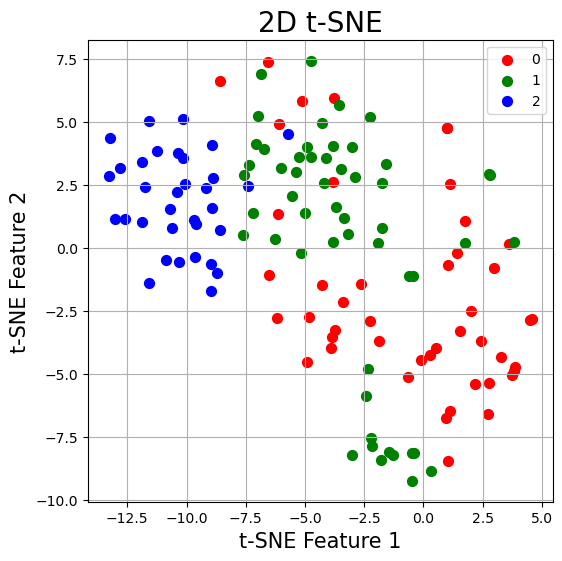

In [12]:
# visualizing the result
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('t-SNE Feature 1', fontsize = 15)
ax.set_ylabel('t-SNE Feature 2', fontsize = 15)
ax.set_title('2D t-SNE', fontsize = 20)
diagnoses = [0, 1, 2]
colors = ['r', 'g', 'b']
for diagnosis, color in zip(diagnoses,colors):
    indicesToKeep = tsne_df_2d['Діагноз'] == diagnosis
    ax.scatter(tsne_df_2d.loc[indicesToKeep, 't-SNE1']
               , tsne_df_2d.loc[indicesToKeep, 't-SNE2']
               , c = color
               , s = 50)
ax.legend(diagnoses)
ax.grid()

In [13]:
# initializing t-SNE with 3 components
tsne = TSNE(n_components=3)

# fitting t-SNE to the preprocessed data
tsne_result_3d = tsne.fit_transform(normalized_df)
tsne_result_3d

array([[-4.56852417e+01,  7.26899385e+00, -5.33428497e+01],
       [ 7.26747751e+00, -3.31982498e+01, -4.53133545e+01],
       [ 1.54449673e+01,  7.55082245e+01,  8.47400436e+01],
       [ 4.74597740e+01,  2.82581940e+01, -1.95007629e+01],
       [-3.15141811e+01,  4.47559052e+01, -9.92984772e+01],
       [ 1.42092199e+01, -3.22029400e+00,  8.53881531e+01],
       [ 9.19189758e+01,  5.40168381e+01, -1.15595238e+02],
       [ 2.99072380e+01,  1.96014271e+01,  1.00359917e+02],
       [-3.02284956e+00, -3.04943657e+01,  1.00143097e+02],
       [-7.30683947e+00,  2.19722462e+01, -8.03258057e+01],
       [-2.47058239e+01,  2.43125081e+00, -3.46939621e+01],
       [ 2.30302181e+01,  8.49198532e+00, -3.20874825e+01],
       [ 2.47780399e+01,  4.02837906e+01,  8.06941147e+01],
       [-4.79391785e+01,  5.29094353e+01, -3.80061874e+01],
       [ 4.44750938e+01, -2.48744011e+01, -5.35337067e+01],
       [ 2.66947441e+01, -6.49859085e+01,  8.77860260e+01],
       [-2.10041332e+01, -1.22721214e+01

In [14]:
tsne_df_3d = pd.DataFrame(data=tsne_result_3d, 
                         columns=['t-SNE1', 
                                  't-SNE2', 
                                  't-SNE3'])
tsne_df_3d['Діагноз'] = df_diagnosis['Діагноз']
tsne_df_3d

,t-SNE1,t-SNE2,t-SNE3,Діагноз
0,-45.685242,7.268994,-53.342850,0
1,7.267478,-33.198250,-45.313354,0
2,15.444967,75.508224,84.740044,0
3,47.459774,28.258194,-19.500763,0
4,-31.514181,44.755905,-99.298477,0
...,...,...,...,...
127,-96.971107,22.992590,1.845837,2
128,-97.784744,-26.092743,-34.076191,2
129,69.044502,-13.601145,-24.129675,2
130,-54.891830,6.115214,12.696228,2


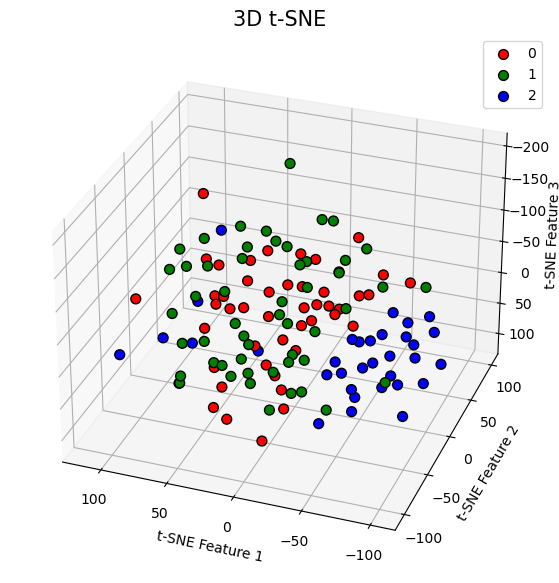

In [15]:
# visualizing the result
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('t-SNE Feature 1', fontsize = 10)
ax.set_ylabel('t-SNE Feature 2', fontsize = 10)
ax.set_zlabel('t-SNE Feature 3', fontsize = 10)
ax.set_title('3D t-SNE', fontsize = 15)
diagnoses = [0, 1, 2]
colors = ['r', 'g', 'b']
for diagnosis, color in zip(diagnoses,colors):
    indicesToKeep = tsne_df_3d['Діагноз'] == diagnosis
    ax.scatter(tsne_df_3d.loc[indicesToKeep, 't-SNE1'],
               tsne_df_3d.loc[indicesToKeep, 't-SNE2'],
               tsne_df_3d.loc[indicesToKeep, 't-SNE3'],
               c = color, alpha = 1, edgecolor='k',
               s = 50)
ax.view_init(elev=-150, azim=70)
ax.legend(diagnoses)
ax.grid()

In [16]:
# finding better parameters for visualizing DataFrame by TSNE method (perplexity, n_iter, learning_rate)
# let's try to make distinct clusters within the group

tsne = TSNE(n_components=2, perplexity=20, learning_rate=400, n_iter=2000, random_state=42)

tsne_components = tsne.fit_transform(normalized_df)

df_tsne_tuned = pd.DataFrame({
    'Діагноз': df_diagnosis['Діагноз'],
    't-SNE1': tsne_components[:, 0],
    't-SNE2': tsne_components[:, 1]
})
df_tsne_tuned

,Діагноз,t-SNE1,t-SNE2
0,0,-144.453934,161.805267
1,0,-37.066631,33.207535
2,0,-81.072380,6.434339
3,0,-140.768204,44.828831
4,0,-62.870716,230.411072
...,...,...,...
127,2,102.311035,-141.581589
128,2,-37.118706,-139.704285
129,2,36.155373,-134.295410
130,2,118.818291,-165.486084


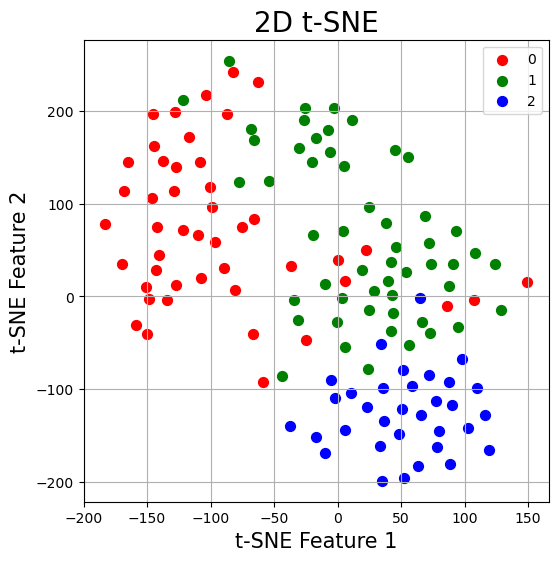

In [17]:
# visualizing the result
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('t-SNE Feature 1', fontsize = 15)
ax.set_ylabel('t-SNE Feature 2', fontsize = 15)
ax.set_title('2D t-SNE', fontsize = 20)
diagnoses = [0, 1, 2]
colors = ['r', 'g', 'b']
for diagnosis, color in zip(diagnoses,colors):
    indicesToKeep = df_tsne_tuned['Діагноз'] == diagnosis
    ax.scatter(df_tsne_tuned.loc[indicesToKeep, 't-SNE1']
               , df_tsne_tuned.loc[indicesToKeep, 't-SNE2']
               , c = color
               , s = 50)
ax.legend(diagnoses)
ax.grid()

In [18]:
# initializing t-SNE with 3 components and tuned parameters
tsne = TSNE(n_components=3, perplexity=15, learning_rate=10, n_iter=500)
#tsne = TSNE(n_components=3, perplexity=5, learning_rate=10, n_iter=500, random_state=42)

# fitting t-SNE to the preprocessed data
tuned_tsne_result_3d = tsne.fit_transform(normalized_df)

df_tsne_tuned_3d = pd.DataFrame(data=tuned_tsne_result_3d, 
                         columns=['t-SNE1', 
                                  't-SNE2', 
                                  't-SNE3'])
df_tsne_tuned_3d['Діагноз'] = df_diagnosis['Діагноз']
df_tsne_tuned_3d

,t-SNE1,t-SNE2,t-SNE3,Діагноз
0,-1.429562,11.373234,-1.891513,0
1,-1.339001,4.956829,3.232602,0
2,8.836178,-1.986473,7.081732,0
3,12.768844,4.179444,4.846951,0
4,3.658371,10.429618,-9.940758,0
...,...,...,...,...
127,-16.411867,1.176099,2.227903,2
128,-6.247011,0.356009,-3.290569,2
129,-14.755099,-6.384440,4.021781,2
130,-16.603140,-8.130708,1.585688,2


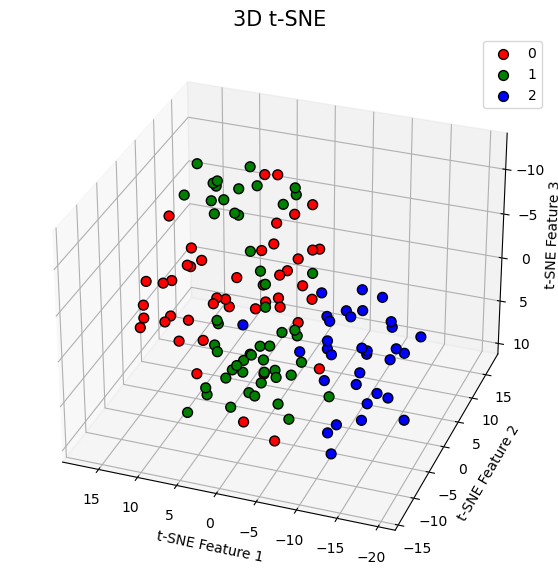

In [19]:
# visualizing the result
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('t-SNE Feature 1', fontsize = 10)
ax.set_ylabel('t-SNE Feature 2', fontsize = 10)
ax.set_zlabel('t-SNE Feature 3', fontsize = 10)
ax.set_title('3D t-SNE', fontsize = 15)
diagnoses = [0, 1, 2]
colors = ['r', 'g', 'b']
for diagnosis, color in zip(diagnoses,colors):
    indicesToKeep = df_tsne_tuned_3d['Діагноз'] == diagnosis
    ax.scatter(df_tsne_tuned_3d.loc[indicesToKeep, 't-SNE1'],
               df_tsne_tuned_3d.loc[indicesToKeep, 't-SNE2'],
               df_tsne_tuned_3d.loc[indicesToKeep, 't-SNE3'],
               c = color, alpha = 1, edgecolor='k',
               s = 50)
ax.view_init(elev=-150, azim=70)
ax.legend(diagnoses)
ax.grid()

###### -- Divide preprocessed dataset into train and test sets.

In [20]:
from sklearn.model_selection import train_test_split

# splitting the data into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(normalized_df,
                                                    df_filled['Діагноз'],
                                                    test_size=0.3,
                                                    random_state=42)

print("x_train, x_test:", x_train.shape, x_test.shape)
print("y_train, y_test:", y_train.shape, y_test.shape)

x_train, x_test: (92, 95) (40, 95)
y_train, y_test: (92,) (40,)


###### -- Use different clustering approaches as AffinityPropagation, AgglomerativeClustering, DBSCAN, FeatureAgglomeration, KMeans, SpectralClustering, SpectralBiclustering, SpectralCoclustering to divide dataframe after preprocessing to 3 groups. Tune parameters for each of proposed clustering algorithms.

In [21]:
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import( AffinityPropagation, 
AgglomerativeClustering, DBSCAN, FeatureAgglomeration,
KMeans, SpectralClustering, SpectralBiclustering, 
SpectralCoclustering)

algorithms = []
algorithms.append(AffinityPropagation(preference=-100))
algorithms.append(AgglomerativeClustering(n_clusters=3))
algorithms.append(DBSCAN(eps=1, min_samples = 5))
algorithms.append(FeatureAgglomeration(n_clusters=3))
algorithms.append(KMeans(n_clusters=3, random_state=1))
algorithms.append(SpectralClustering(n_clusters=3, random_state=1, affinity='nearest_neighbors'))
algorithms.append(SpectralBiclustering(n_clusters=3))
algorithms.append(SpectralCoclustering(n_clusters=3))

###### -- Compare the results with Diagnosis column using ARI, AMI, Homogeneity, Completeness and V-measure metrics. Choose the best clustering algorithm.

In [22]:
data = []
for algorithm in algorithms:
    # fitting the clustering algorithm to the training data
    algorithm.fit(x_train)
    
    # checking the type of the clustering algorithm to determine the true and predicted labels
    if isinstance(algorithm, SpectralBiclustering) or isinstance(algorithm, SpectralCoclustering):
        labels_pred = algorithm.row_labels_
        labels_true = y_train
    elif isinstance(algorithm, FeatureAgglomeration):
        labels_pred = algorithm.labels_
        labels_true = normalized_df.columns
    else:
        labels_pred = algorithm.labels_
        labels_true = y_train

    # calculating clustering performance metrics
    metrics_dict = {
        'ARI': metrics.adjusted_rand_score(labels_true, labels_pred),
        'AMI': metrics.adjusted_mutual_info_score(labels_true, labels_pred),
        'Homogeneity': metrics.homogeneity_score(labels_true, labels_pred),
        'Completeness': metrics.completeness_score(labels_true, labels_pred),
        'V-measure': metrics.v_measure_score(labels_true, labels_pred)
    }
    data.append(metrics_dict)

results = pd.DataFrame(data=data, columns=data[0].keys(), 
                                 index=['AffinityPropagation', 'AgglomerativeClustering',
                                        'DBSCAN', 'FeatureAgglomeration',
                                        'KMeans', 'SpectralClustering',
                                        'SpectralBiclustering', 'SpectralCoclustering'
                                       ])
results

C:\Users\igor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,ARI,AMI,Homogeneity,Completeness,V-measure
AffinityPropagation,0.288558,3.075463e-01,0.316494,0.327972,0.322131
AgglomerativeClustering,0.408863,4.500875e-01,0.457880,0.465223,0.461522
DBSCAN,0.000000,0.000000e+00,0.000000,1.000000,0.000000
FeatureAgglomeration,0.000000,-2.982395e-14,0.231592,1.000000,0.376086
KMeans,0.467981,4.805063e-01,0.491568,0.490824,0.491196
SpectralClustering,0.382566,4.053701e-01,0.415078,0.420368,0.417706
SpectralBiclustering,0.132213,1.789733e-01,0.196301,0.195371,0.195835
SpectralCoclustering,0.383473,4.654538e-01,0.383286,0.640855,0.479681


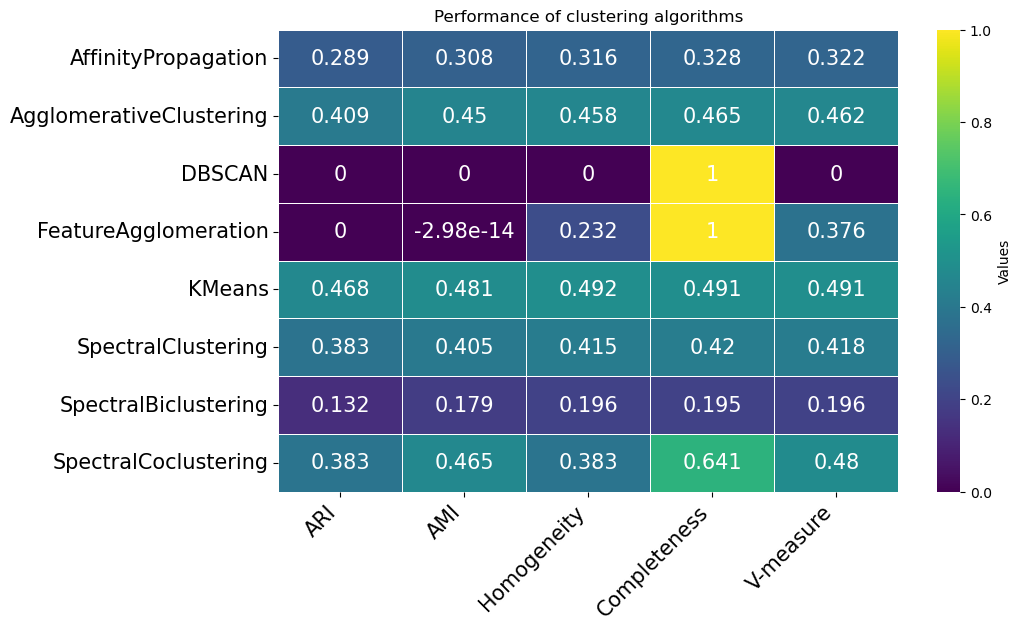

In [23]:
# visualizing the result
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# adding metric labels
ax.set_xticks(range(results.shape[1]))
ax.set_yticks(range(results.shape[0]))
ax.set_xticklabels(results.columns, rotation=45, ha='right', fontsize=15)
ax.set_yticklabels(results.index, fontsize=15)

# adding text annotations to the plot
for i in range(results.shape[0]):
    for j in range(results.shape[1]):
        ax.text(j + 0.5, i + 0.5, f'{results.iloc[i, j]:.3g}', ha='center', va='center', fontsize=15, color="white")

# creating heatmap
sns.heatmap(results, annot=False, cmap='viridis', linewidths=.5, cbar_kws={"label": "Values"})

plt.title("Performance of clustering algorithms")
plt.show()


C:\Users\igor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


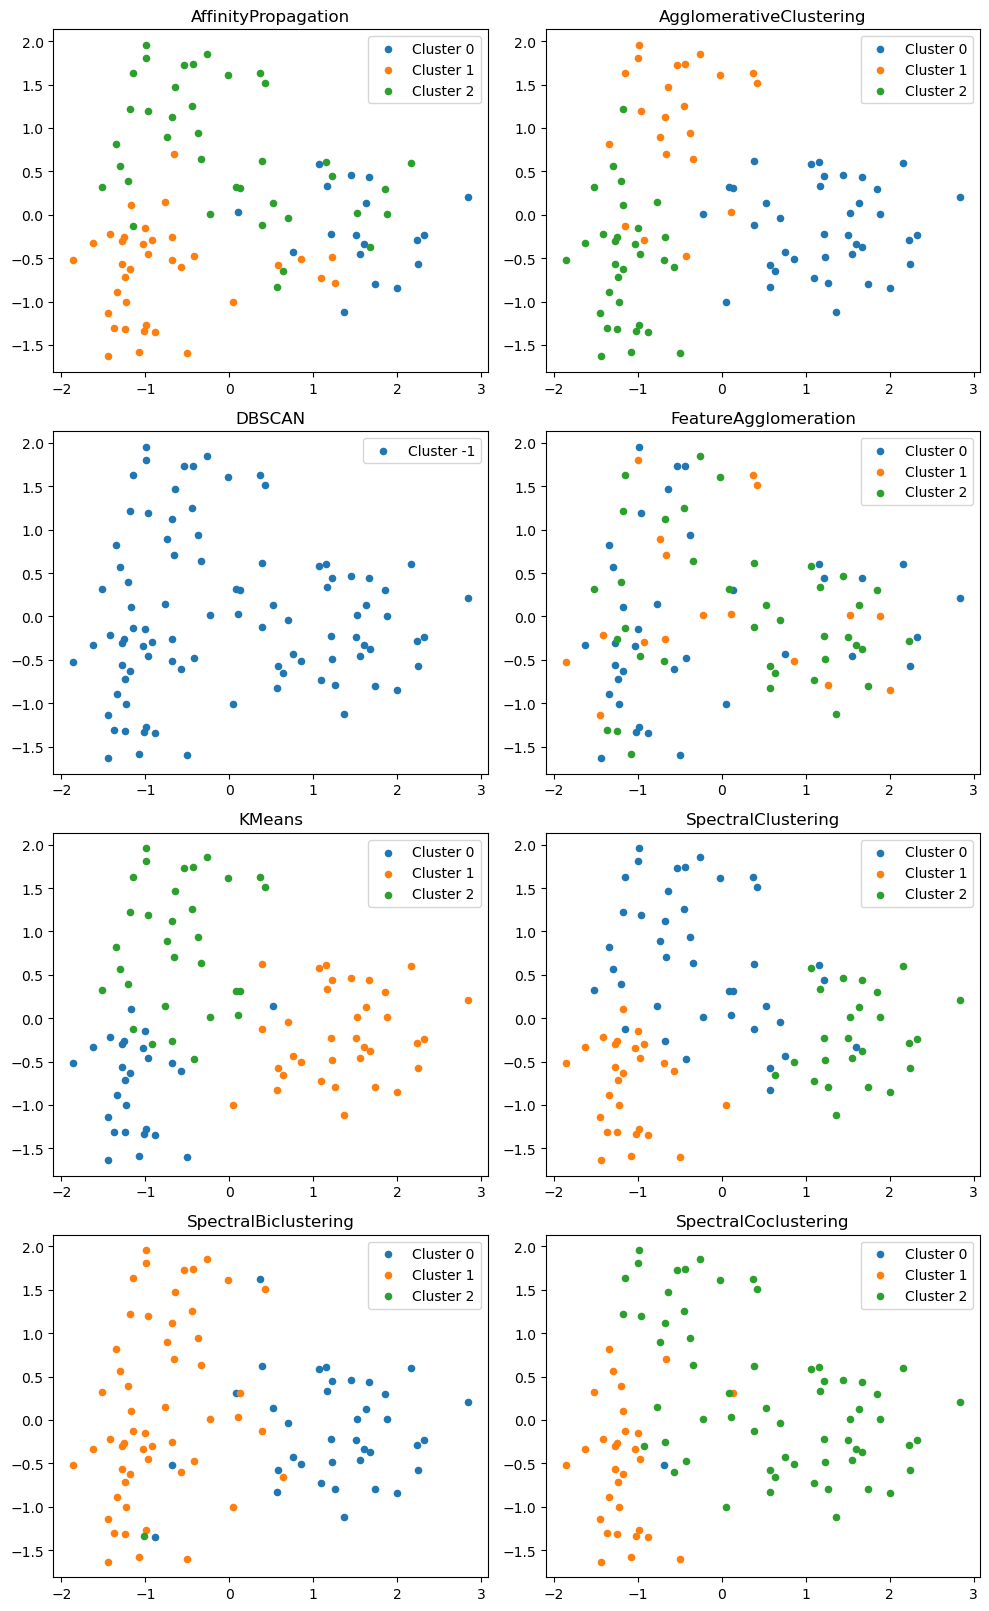

In [24]:
# visualizing the result
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration

plt.figure(figsize=(10, 20))

for idx, algorithm in enumerate(algorithms):
    # creating subplot
    plt.subplot((len(algorithms) // 2) + 1, 2, idx + 1)

    algorithm.fit(x_train)
    
    # reducing the dimensionality
    pca = PCA(n_components=2)
    x_pca_2 = pca.fit_transform(x_train)
    
    # getting the predicted labels from the algs
    labels = getattr(algorithm, 'labels_', getattr(algorithm, 'row_labels_', None))

    # ensuring that the length of labels matches the number of samples in x_pca_2
    if labels is not None and len(labels) != len(x_pca_2):
        labels = labels[:len(x_pca_2)]

    # plotting clusters
    unique_labels = np.unique(labels)
    for label in unique_labels:
        cluster_points = x_pca_2[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', s=20)

    plt.title(type(algorithm).__name__)
    plt.legend()

plt.tight_layout()
plt.show()

DBSCAN shows only one cluster as it groups together data points that are close to each other and have a sufficient number of neighboring points within a specified distance. However, this dataset primarily consists of 0s and 1s, so the DBSCAN algorithm struggles to effectively cluster it.

###### Determining the best algorithm: 

- <b>ARI</b>: higher values indicated better similarity between true and predicted cluster assignments - KMeans has the highest, then SpectralClustering and AgglomerativeClustering;
- <b>AMI</b>: higher values indicated better agreement between true and predicted labels - SpectralClustering has the highest, then KMeans and AgglomerativeClustering;
- <b>Homogeneity</b>: how well each cluster contains only members of one class - SpectralClustering has the highest, then KMeans and AgglomerativeClustering;
- <b>Completeness</b>: whether all members of a given class are assigned to the same cluster - SpectralClustering has the highest, then KMeans and AgglomerativeClustering;
- <b>V-measure</b>: harmonic mean of homogeneity and completeness - SpectralClustering has the highest, then KMeans and AgglomerativeClustering;

<b>In summary, SpectralClustering, KMeans and AgglomerativeClustering are the best clustering algorithms for current dataset.</b> AffinityPropagation, SpectralBiclustering and SpectralCoclustering have lower scores compared to other methods. DBSCAN and FeatureAgglomeration have poor performance on these metrics.

##### -- Try to improve clustering result by adding Feature Selection preprocessing stage (before clustering stage) using some methods as VarianceThreshold() or other you are familiar with.

In [25]:
from sklearn.feature_selection import VarianceThreshold

# setting a preference to make an appropriate number of clusters
algorithms[0] = AffinityPropagation(preference=-50)

# performing feature selection - removing features with low variance
thresholdTrain = VarianceThreshold(threshold=0.2)
x_train_sel = thresholdTrain.fit_transform(x_train)

data = []
for algorithm in algorithms:
    algorithm.fit(x_train_sel)
    if isinstance(algorithm, SpectralBiclustering) or isinstance(algorithm, SpectralCoclustering):
        labels_pred = algorithm.row_labels_
        labels_true = y_train
    elif isinstance(algorithm, FeatureAgglomeration):
        labels_pred = algorithm.labels_
        labels_true = y_train[:algorithm.labels_.size]
    else:
        labels_pred = algorithm.labels_
        labels_true = y_train

    metrics_dict = {
        'ARI': metrics.adjusted_rand_score(labels_true, labels_pred),
        'AMI': metrics.adjusted_mutual_info_score(labels_true, labels_pred),
        'Homogeneity': metrics.homogeneity_score(labels_true, labels_pred),
        'Completeness': metrics.completeness_score(labels_true, labels_pred),
        'V-measure': metrics.v_measure_score(labels_true, labels_pred)
    }
    data.append(metrics_dict)

results = pd.DataFrame(data=data, columns=data[0].keys(), 
                                 index=['AffinityPropagation', 'AgglomerativeClustering',
                                        'DBSCAN', 'FeatureAgglomeration',
                                        'KMeans', 'SpectralClustering',
                                        'SpectralBiclustering', 'SpectralCoclustering'
                                       ])
results

C:\Users\igor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,ARI,AMI,Homogeneity,Completeness,V-measure
AffinityPropagation,0.188766,0.182047,0.199355,0.198328,0.198840
AgglomerativeClustering,0.282286,0.304372,0.316004,0.321764,0.318858
DBSCAN,0.000000,0.000000,0.000000,1.000000,0.000000
FeatureAgglomeration,0.036801,0.104469,0.219503,0.203681,0.211296
KMeans,0.328248,0.338879,0.351036,0.354112,0.352567
SpectralClustering,0.305782,0.323783,0.334057,0.341853,0.337910
SpectralBiclustering,0.215490,0.244194,0.259688,0.259843,0.259765
SpectralCoclustering,0.426647,0.412306,0.422261,0.426733,0.424485


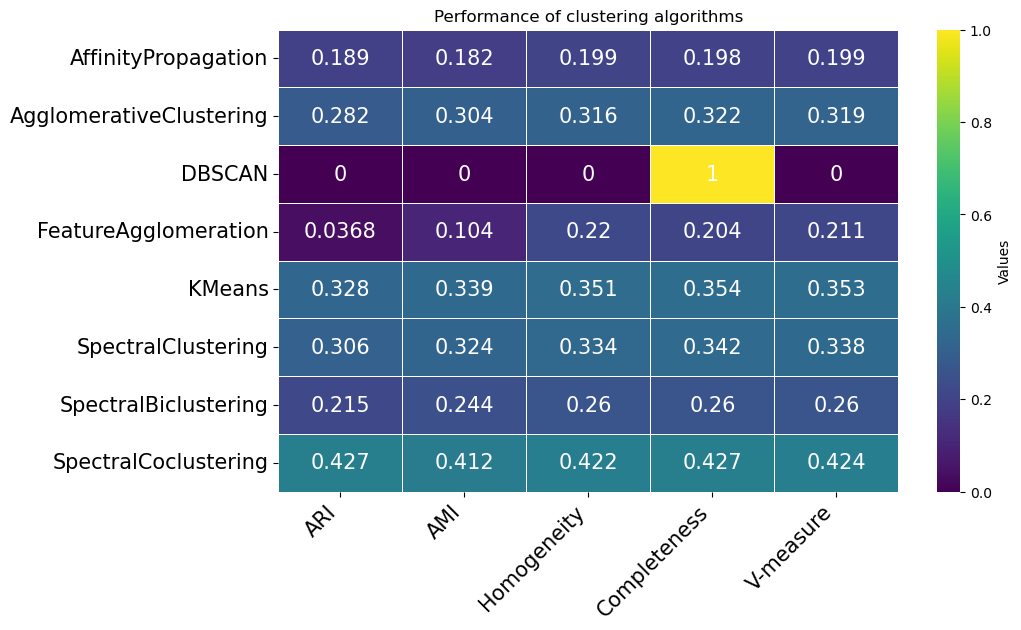

In [26]:
# visualizing the result
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xticks(range(results.shape[1]))
ax.set_yticks(range(results.shape[0]))
ax.set_xticklabels(results.columns, rotation=45, ha='right', fontsize=15)
ax.set_yticklabels(results.index, fontsize=15)

for i in range(results.shape[0]):
    for j in range(results.shape[1]):
        ax.text(j + 0.5, i + 0.5, f'{results.iloc[i, j]:.3g}', ha='center', va='center', fontsize=15, color="white")

sns.heatmap(results, annot=False, cmap='viridis', linewidths=.5, cbar_kws={"label": "Values"})
plt.title("Performance of clustering algorithms")
plt.show()

C:\Users\igor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


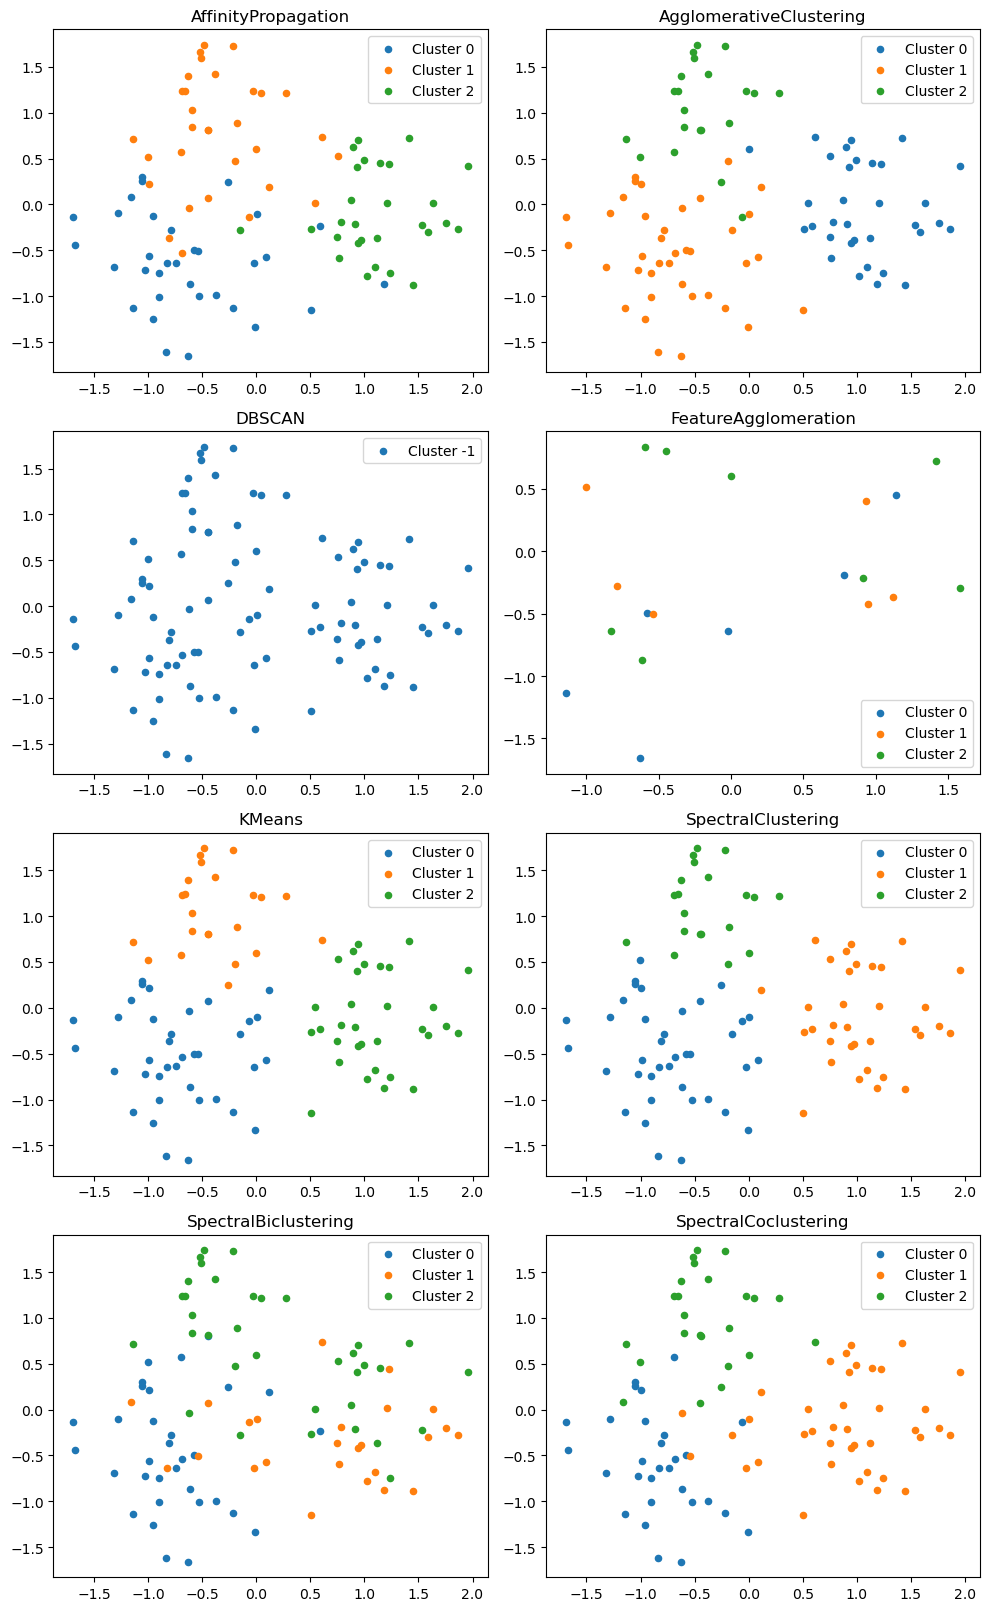

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration

plt.figure(figsize=(10, 20))

for idx, algorithm in enumerate(algorithms):
    plt.subplot((len(algorithms) // 2) + 1, 2, idx + 1)

    algorithm.fit(x_train_sel)
    pca = PCA(n_components=2)
    x_pca_2 = pca.fit_transform(x_train_sel)
    labels = getattr(algorithm, 'labels_', getattr(algorithm, 'row_labels_', None))

    if labels is not None and len(labels) != len(x_pca_2):
        labels = labels[:len(x_pca_2)]

    unique_labels = np.unique(labels)
    for label in unique_labels:
        if isinstance(algorithm, FeatureAgglomeration):
            feature_indices = np.where(labels == label)[0]
            cluster_points = x_pca_2[feature_indices]
        else:
            cluster_points = x_pca_2[labels == label]
            
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', s=20)

    plt.title(type(algorithm).__name__)
    plt.legend()

plt.tight_layout()
plt.show()

After improvement using the feature selection preprocessing stage with the VarianceThreshold() method, the <b>SpectralCoclustering algorithm demonstrates the best performance across all metrics</b>. So, we can conclude that it is the best algorithm for this dataset.